In [11]:
#importing libraries
import numpy as np
from pandas import read_csv
from matplotlib import pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_squared_error 
from math import sqrt 
import statsmodels.api as sm
import warnings
warnings.filterwarnings("ignore")

### 1 Holts linear trend damped method (additive trend, no seasonality, damped model)

In [12]:
#importing dataset
data1 = read_csv('datasets/holt_data.csv')
series1=data1[['year','Passengers_trend']]
series1=series1.dropna()
series1.tail(2)

,year,Passengers_trend
25,2015.0,69.78
26,2016.0,72.60


In [13]:
#train test split
train1 = series1.iloc[0:20]
test1 = series1.iloc[20:]
y_hat1 = test1.copy()

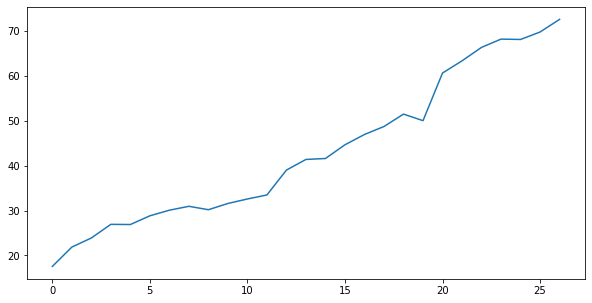

In [14]:
# plot 
plt.figure(figsize=(10,5))
plt.plot(series1['Passengers_trend'], label='Passengers')
plt.show()

In [15]:
#fitting Holt linerar trend_damped model
model11 = ExponentialSmoothing(np.asarray(train1['Passengers_trend']), trend='add', damped_trend=True,).fit(optimized=True)
y_hat1['Holt linerar trend_damped'] = model11.forecast(len(test1))

In [16]:
#fitting Holt-Winters model
model22 = ExponentialSmoothing(np.asarray(train1['Passengers_trend']), trend='add',damped_trend=False,).fit(optimized=True)
y_hat1['Holt linerar trend'] = model22.forecast(len(test1))
y_hat1.head(2)

,year,Passengers_trend,Holt linerar trend_damped,Holt linerar trend
20,2010.0,60.64,51.357789,52.078015
21,2011.0,63.36,51.700227,53.789845


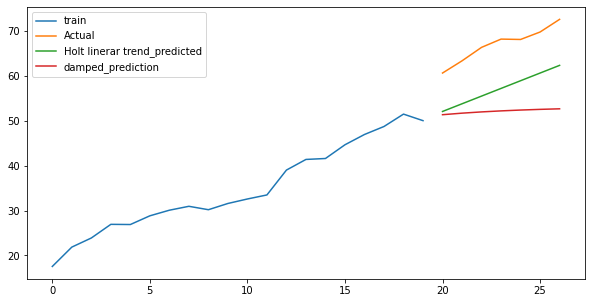

In [17]:
#plots
plt.figure(figsize=(10,5))
plt.plot(train1['Passengers_trend'], label='train')
plt.plot(test1['Passengers_trend'], label='Actual')
plt.plot(y_hat1['Holt linerar trend'], label='Holt linerar trend_predicted')
plt.plot(y_hat1['Holt linerar trend_damped'], label='damped_prediction')
plt.legend(loc='best')
plt.show()

### 2 Holt-Winters’ damped method (Addtitive trend, multiplicative seasonality, damped model)

In [18]:
##Importing dataset
data = read_csv('datasets/holt_data.csv')

In [19]:
series=data[['Month','Passengers']]
series.head(2)

,Month,Passengers
0,1949-01,112
1,1949-02,118


In [20]:
#train test split
train = series.iloc[0:110]
test = series.iloc[110:]
y_hat = test.copy()

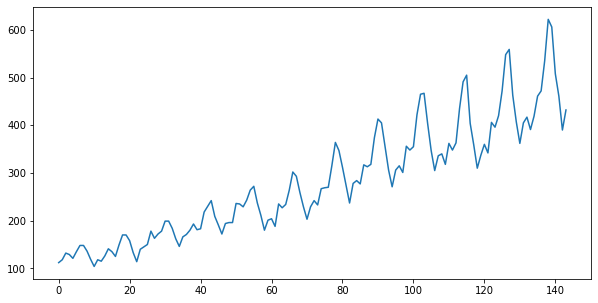

In [21]:
# plot 
plt.figure(figsize=(10,5))
plt.plot(series['Passengers'], label='Passengers')
plt.show()

In [30]:
#fitting Holt-Winters_damped model
model = ExponentialSmoothing(np.asarray(train['Passengers']), seasonal_periods=12, trend='add', seasonal='mul',damped_trend=0.9,).fit(optimized=True)
y_hat['Holt-Winters’ damped  method'] = model.forecast(len(test))

In [31]:
#fitting Holt-Winters model
model2 = ExponentialSmoothing(np.asarray(train['Passengers']), seasonal_periods=12, trend='add', seasonal='mul',damped_trend=False,).fit(optimized=True)
y_hat['Holt-Winters’ method_2'] = model2.forecast(len(test))
y_hat.head(2)

,Month,Passengers,Holt-Winters’ damped method,Holt-Winters’ method_2
110,1958-03,362,368.238691,368.985538
111,1958-04,348,357.909673,359.358952


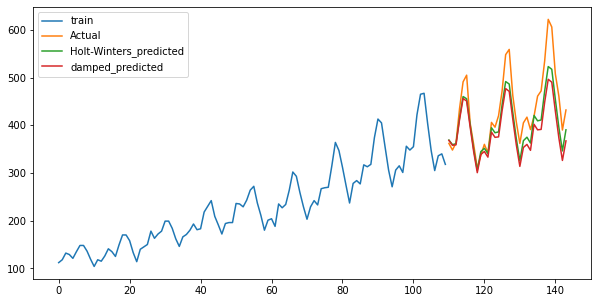

In [32]:
#plots
plt.figure(figsize=(10,5))
plt.plot(train['Passengers'], label='train')
plt.plot(test['Passengers'], label='Actual')
plt.plot(y_hat['Holt-Winters’ method_2'], label='Holt-Winters_predicted')
plt.plot(y_hat['Holt-Winters’ damped  method'], label='damped_predicted')
plt.legend(loc='best')
plt.show()

### No trend - Multiplicative seasonality model

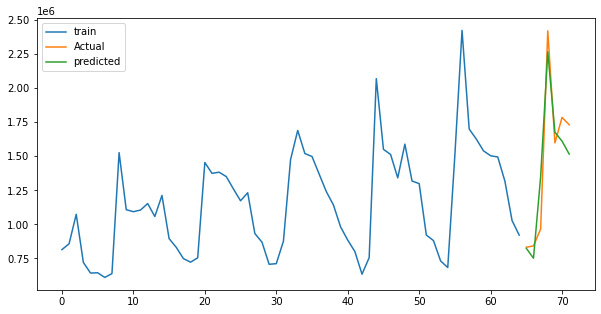

In [164]:
#importing data
data2 = read_csv('datasets/holt_data.csv')
series2=data2[['months','data']]
series2=series2.dropna()

#train test split
train2 = series2.iloc[0:65]
test2 = series2.iloc[65:]
y_hat2 = test2.copy()

#fitting Holt-Winters model
model2 = ExponentialSmoothing(np.asarray(train2['data']), seasonal_periods=12, trend=None, seasonal='mul',damped_trend=False,).fit(optimized=True)
y_hat2['predicted'] = model2.forecast(len(test2))
y_hat2.head(2)

#plots
plt.figure(figsize=(10,5))
plt.plot(train2['data'], label='train')
plt.plot(test2['data'], label='Actual')
plt.plot(y_hat2['predicted'], label=('predicted'))
plt.legend(loc='best')
plt.show()

### Additive trend -Additive seasonality model

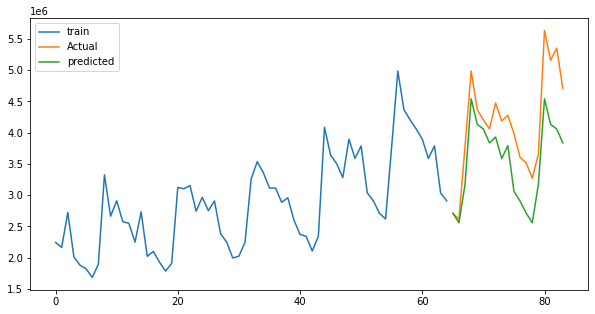

In [165]:
#importing data
data3 = read_csv('datasets/holt_data.csv')
series3=data3[['months3','data3']]
series3=series3.dropna()

#train test split
train3 = series3.iloc[0:65]
test3 = series3.iloc[65:]
y_hat3 = test3.copy()

#fitting Holt-Winters model
model3 = ExponentialSmoothing(np.asarray(train3['data3']), seasonal_periods=12, trend=None, seasonal='mul',damped_trend=False,).fit(optimized=True)
y_hat3['predicted'] = model3.forecast(len(test3))
y_hat3.head(2)

#plots
plt.figure(figsize=(10,5))
plt.plot(train3['data3'], label='train')
plt.plot(test3['data3'], label='Actual')
plt.plot(y_hat3['predicted'], label=('predicted'))
plt.legend(loc='best')
plt.show()